# IMDB Datasets

In [77]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [78]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [79]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 1s 12ms/step - loss: 0.5729 - acc: 0.6945 - val_loss: 0.3715 - val_acc: 0.8731
Epoch 2/5
118/118 [==============================] - 1s 8ms/step - loss: 0.3704 - acc: 0.8541 - val_loss: 0.2787 - val_acc: 0.8867
Epoch 3/5
118/118 [==============================] - 1s 8ms/step - loss: 0.2812 - acc: 0.8983 - val_loss: 0.2820 - val_acc: 0.8839
Epoch 4/5
118/118 [==============================] - 1s 9ms/step - loss: 0.2232 - acc: 0.9202 - val_loss: 0.2924 - val_acc: 0.8815
Epoch 5/5
118/118 [==============================] - 1s 8ms/step - loss: 0.1835 - acc: 0.9365 - val_loss: 0.3123 - val_acc: 0.8822


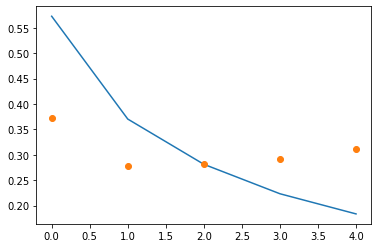

In [80]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [81]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3344 - acc: 0.8751


## IMDB Classification using simple RNN
영화 리뷰 반응 판별

In [82]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 300 # sequence length

In [83]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [84]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   

In [85]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정
rnn.add(layers.Dropout(0.2))
rnn.add(layers.SimpleRNN(16))
rnn.add(layers.Dropout(0.2))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])

In [86]:
rnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, None, 32)          1568      
_________________________________________________________________
dropout_26 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 162,369
Trainable params: 162,369
Non-trainable params: 0
_______________________________________________

In [87]:
history = rnn.fit(X_train, y_train, epochs=7, batch_size=64, validation_split=0.2)

Epoch 1/7
313/313 [==============================] - 29s 93ms/step - loss: 0.5770 - acc: 0.6762 - val_loss: 0.4149 - val_acc: 0.8158
Epoch 2/7
313/313 [==============================] - 29s 93ms/step - loss: 0.3586 - acc: 0.8564 - val_loss: 0.4172 - val_acc: 0.8164
Epoch 3/7
313/313 [==============================] - 28s 91ms/step - loss: 0.3045 - acc: 0.8806 - val_loss: 0.3700 - val_acc: 0.8578
Epoch 4/7
313/313 [==============================] - 29s 93ms/step - loss: 0.2242 - acc: 0.9224 - val_loss: 0.3630 - val_acc: 0.8572
Epoch 5/7
313/313 [==============================] - 28s 90ms/step - loss: 0.1664 - acc: 0.9440 - val_loss: 0.4632 - val_acc: 0.8438
Epoch 6/7
313/313 [==============================] - 28s 90ms/step - loss: 0.2082 - acc: 0.9192 - val_loss: 0.4567 - val_acc: 0.8320
Epoch 7/7
313/313 [==============================] - 28s 90ms/step - loss: 0.1014 - acc: 0.9660 - val_loss: 0.5354 - val_acc: 0.8202


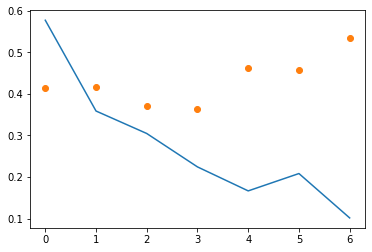

In [88]:
loss = history.history['loss']
val = history.history['val_loss']
plt.plot(loss)
plt.plot(val, 'o')

In [89]:
test_loss, test_acc = rnn.evaluate(X_test,y_test)

782/782 [==============================] - 12s 16ms/step - loss: 0.5485 - acc: 0.8185


### RNN으로는 좋은 결과를 얻을 수 없었다.
### RNN의 변형인 LSTM과
### LSTM을 간소화한 GRU를 이용하면 RNN보다 좋은 결과를 얻을 수 있다는 것을
### 알았다.
리뷰 평균길이가 약 238이라서 maxlen을 300으로 수정하였다.
코드는 제외했지만 maxlen이 100인 것보다 acc가 약 0.3 더 높은 결과를 얻었다.